In [1]:
%matplotlib inline

# Question 1

## 1(a)
α-helix H having mean 15 residues.
thus H transitions to other probablity is 1/15.
We have. 
 $$
   a_{HH} = 1 - 1/15  = 14/15 \\
   a_{HS} = 1/15 \times 0.30 = 0.02 \\
   a_{HT} = 1/15 \times 0.70 = 7 / 150 \\
 $$

β-strands S having mean 8 residues.
thus S transitions to other probablity is 1/8.
We have. 
 $$
   a_{SS} = 1 - 1/8  = 0.875 \\
   a_{SH} = 1/8 \times 0.4 = 0.05 \\
   a_{ST} = 1/8 \times 0.6 = 0.075 \\
 $$

loops a mean of 6 residues
thus T transitions to other probablity is 1/6.
We have. 
 $$
   a_{TT} = 1 - 1/6  = 5/6 \\
   a_{TH} = 1/6 \times 0.5 = 1/12 \\
   a_{TS} = 1/6 \times 0.5 = 1/12 \\
 $$


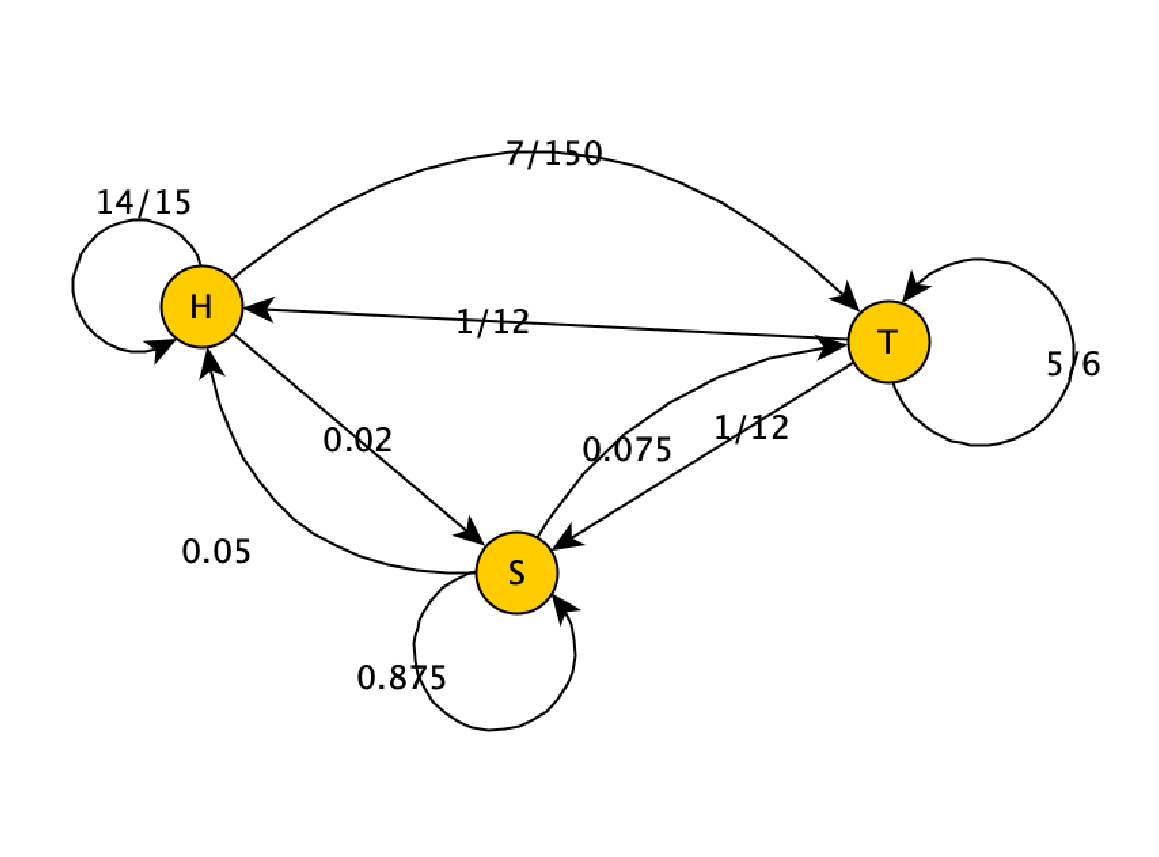

In [44]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
try:
    img=mpimg.imread('hmm.png')
    plt.figure(figsize=(20,20))
    plt.axis('off')
    plt.imshow(img)
except:
    print("no drawn image hmm.png found")

** Emission Probabilities Table **

|      | B    | I    | N    |
| ---- | ---- | ---- | ---- |
| H    | 0.3  | 0.6  | 0.1  |
| S    | 0.55 | 0.15 | 0.3  |
| T    | 0.1  | 0.2  | 0.7  |

## 1(b)

In [2]:
states = 'HST'
symbols = 'BIN'

transition = [[14.0 / 15, 0.02, 7.0 / 150],
              [0.05, 0.875, 0.075], 
              [1.0 / 12, 5.0 / 6, 1.0 / 12]
             ]

emission = [
             [0.3, 0.6, 0.1],
             [0.55, 0.15, 0.3],
             [0.1, 0.2, 0.7],
           ]

import numpy.random as rand
def simulateHMM(n):
    
    state = rand.choice(3)
    symbol = rand.choice(3, p=emission[state])
    seqs = [(state, symbol)]
    for i in range(1, n):
        state = rand.choice(3, p=transition[state])
        symbol = rand.choice(3, p=emission[state])
        seqs.append((state, symbol))
    
    
    seqStrs = [(states[state], symbols[symbol]) for (state, symbol) in seqs]
    stateSeq = [x[0] for x in seqStrs]
    symbolSeq = [x[1] for x in seqStrs]
    return stateSeq, symbolSeq

stateSeq, symbolSeq = simulateHMM(150)


print(stateSeq)
print()
print(symbolSeq)

['T', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'T', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'T', 'S', 'T', 'S', 'S', 'H', 'H', 'H', 'T', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'T', 'T', 'S', 'S', 'S', 'S', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'S', 'S', 'S', 'S', 'S', 'T', 'S', 'T', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']

['N', 'B', 'I', 'B', 'N', 'I', 'N', 'B', 'B', 'B', 'N', 'N', 'N', 'I', 'I', 'B', 'I', 'B', 'B', 'B', 'B', 'N', 'B', 'B', 'N', 'N', 'B', 'N', 'I', 'I', 'I', 'N', 'B', 'I', 'B', 'N', 'B', 'B', 'N', 'B', 'B', 'B', 'N', 'N', 'I', 'N', 'B', 'N', 'B', 'B

## 1(C)

In [3]:

import numpy as np
def computeProb(symbolSeq, stateSeq):
    symbolSeq = [symbols.index(x) for x in symbolSeq]
    stateSeq = [states.index(x) for x in stateSeq]
    state = stateSeq[0]
    symbol = symbolSeq[0]
    p = np.log(1.0 / 3) + np.log(emission[state][symbol])
    for i in range(1, len(stateSeq)):
        nextState = stateSeq[i]
        p += np.log(transition[state][nextState])
        state = nextState
        symbol = symbolSeq[i]
        p += np.log(emission[state][symbol])
    return p


print("natural logarithm of the joint probability from Q1b")
print(computeProb(symbolSeq, stateSeq))

print()
print("natural logarithm of the joint probability from example in PDF")
symbolSeq2 = "B,I,N,B,N,I,N,B,N,I,N,B,I,N,B,I,I,N,B,B,N,B".split(",")
stateSeq2 = "S,S,H,H,H,T,T,S,S,S,H,H,H,H,H,H,S,S,S,S,S,S".split(",")
print(computeProb(symbolSeq2, stateSeq2))

natural logarithm of the joint probability from Q1b
-193.736144005

natural logarithm of the joint probability from example in PDF
-46.3877406945


## 1(d)

In [4]:
def logsum(x):
    return x[0] + np.log(np.sum(np.exp(x - x[0])))

In [5]:
def computeForward(symbolSeq):
    symbolSeq = [symbols.index(x) for x in symbolSeq]
    n = len(symbolSeq)
    f = np.zeros((n, 3))
    for i in range(3):
        f[0, i] = np.log(1.0/3) + np.log(emission[i][symbolSeq[0]])
    
    for i in range(1, len(symbolSeq)):
        for l in range(3):
            f[i, l] = np.log(emission[l][symbolSeq[i]])
            
            arr = [f[i-1, k] + np.log(transition[k][l]) for k in range(3)]
            
            f[i, l] += logsum(np.array(arr))
            
    return logsum(f[n-1])

print("natural logarithm of P(x) from Q1b")
print(computeForward(symbolSeq))

print()
print("natural logarithm of P(x) from example in PDF")
print(computeForward(symbolSeq2))


natural logarithm of P(x) from Q1b
-154.601687579

natural logarithm of P(x) from example in PDF
-26.3141226241


We can see that both examples, we can see that 
   $$
     P(x) > P(x, \pi) \\
   $$

The relationship hold in general.
Because 
   $$
     P(x) = \sum_{\pi'} P(x, \pi')  \ge P(x, \pi) \\
   $$



# Question 2

In [6]:
"""
tree69.py
A tree utility library for COMPSCI 369.
"""

# The MIT License (MIT)
#
# Copyright (c) 2016 Arman Bilge and Stuart Bradley
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

def compute_upgma_tree(matrix):

    import itertools as it

    n = len(matrix)
    nodes = [Node(str(i + 1)) for i in range(n)]
    for node in nodes:
        node.set_height(0)
    matrix = {nodes[i]: {nodes[j]: matrix[i][j] for j in range(n)} for i in range(n)}
    while len(matrix) > 1:
        a, b = min(it.combinations(matrix.keys(), 2), key=lambda xy: matrix[xy[0]][xy[1]])
        u = Node()
        u.add_child(a)
        u.add_child(b)
        u.set_height(matrix[a][b] / 2)
        uc = {c: (a.get_leaf_count() * matrix[a][c] + b.get_leaf_count() * matrix[b][c]) / (a.get_leaf_count() + b.get_leaf_count()) for c in matrix.keys() - set((a, b))}
        del matrix[a]
        del matrix[b]
        for k, v in matrix.items():
            del v[a]
            del v[b]
            v[u] = uc[k]
        matrix[u] = uc
    return Tree(u)

def plot_tree(tree):

    import itertools as it
    import numpy as np
    from matplotlib import pyplot as plt

    def compute_node_xy(node, counter=it.count()):
        node.x = node.get_height()
        if node.is_leaf():
            node.y = next(counter)
        else:
            children = node.get_children()
            for child in children:
                compute_node_xy(child, counter)
            node.y = np.mean([c.y for c in children])

    def plot_node(node):
        if node.is_leaf():
            plt.text(node.x, node.y, ' ' + node.get_label(), {'ha':'left', 'va':'center'})
        else:
            children = node.get_children()
            plt.plot([node.x] * 2, [min(c.y for c in children), max(c.y for c in children)], 'k')
            for child in children:
                plt.plot([node.x, child.x], [child.y] * 2, 'k')
                plot_node(child)

    root = tree.get_root()
    compute_node_xy(root)
    plt.plot([root.x, root.x + root.x/16], [root.y] * 2, 'k')
    plot_node(root)
    lc = tree.get_leaf_count()
    plt.ylim(- lc / 16, 17/16 * lc - 1)
    axes = plt.gca()
    axes.invert_xaxis()
    axes.yaxis.set_visible(False)
    axes.set_frame_on(False)
    axes.grid()

"""
Python Tree Class
Stuart Bradley - 5931269
23-05-2014
"""
class Tree:

    def __init__(self, root=None):
        self.root = root

    def set_root(self, root):
        self.root = root

    def get_root(self):
        return self.root

    def get_leaves(self):
        return self.root.get_leaves()

    def get_leaf_count(self):
        return self.root.get_leaf_count()

    def get_newick(self):
        return self.root.get_newick() + ";"

    def __str__(self):
        return self.get_newick()

"""
Python Node Class
Stuart Bradley - 5931269
23-05-2014
"""
class Node:
    def __init__(self, label=None):
        self.parent = None
        self.children = []
        self.height = -1.0
        self.label = label
        self.sequence = None

    def get_parent(self):
        return self.parent

    def set_parent(self, parent):
        self.parent = parent

    def get_children(self):
        return self.children

    def add_child(self, child):
        self.children.append(child)
        child.set_parent(self)

    def remove_child(self, child):
        self.children.remove(child)

    def set_height(self, height):
        self.height = height

    def get_height(self):
        return self.height

    def is_root(self):
        return self.parent == None

    def is_leaf(self):
        return not self.children

    def get_sequence(self):
        return self.sequence

    def set_sequence(self, sequence):
        self.sequence = sequence

    def get_label(self):
        return self.label

    def set_label(self, label):
        self.label = label

    def get_leaves(self):
        leaf_list = []

        if (self.is_leaf()):
            leaf_list.append(self)
        else:
            for child in self.children:
                leaf_list.extend(child.get_leaves())

        return leaf_list

    def get_leaf_count(self):
        if self.is_leaf():
            return 1
        else:
            return sum(map(Node.get_leaf_count, self.children))

    def get_newick(self):
        sb = ""

        if (not self.is_leaf()):
            sb += "("
            for i in range(0, len(self.children)):
                if (i>0):
                    sb += ","
                sb += self.children[i].get_newick()
            sb += ")"

        if (self.label != None):
            sb += self.label

        branch_length = -1.0
        if (not self.is_root()):
            branch_length = self.parent.height - self.height
        else:
            branch_length = 0.0

        sb += ":" + str(branch_length)

        return sb


## 2(a)

In [7]:
import random
import numpy as np

In [8]:

def constructTree(n, lam):
    k = n
    t = 0
    nodes = [0] * n
    for i in range(n):
        nodes[i] = Node(label=str(i+1))
        nodes[i].set_height(t)
    
    nextId = n + 1
    while k > 1:
        tk = random.expovariate(k * lam)
        t += tk
        m = Node(label = str(nextId))
        nextId += 1
        m.set_height(t)
        i = random.randint(0, len(nodes) - 1)
        m.add_child(nodes[i])
        del nodes[i]
        
        j = random.randint(0, len(nodes) - 1)
        m.add_child(nodes[j])
        del nodes[j]
        
        nodes.append(m)
        k -= 1
        
    tree = Tree(nodes[0])
    return tree

In [9]:
n = 10
lam = 0.5
trees = [constructTree(n, lam) for i in range(1000)]
meanHeight = np.mean([t.root.get_height() for t in trees])
print("mean hight: %f" % meanHeight)

mean hight: 3.896269


From above result, we can see that mean hight agrees with the theoretical mean of 3.86.

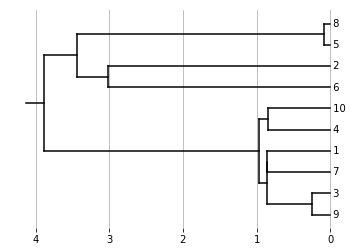

In [10]:
plot_tree(trees[0])

## 2(b)

In [11]:
#
# mutates a sequence according to the Jukes-Cantor model 
# X is an numpy.array with entries in {0,1,2,3}
# t is branch length 
# mu is mutation rate
#
def mutate(X,t,mu):
    import numpy.random as rand
    L= len(X)
    mutatedSeq = X.copy()
  
    numMutation = rand.poisson(L*mu*t)
    for i in range(numMutation):
        site = rand.randint(0,L)
        mutatedSeq[site] =  rand.randint(0,4)
    
    return mutatedSeq


In [12]:
import numpy.random as rand
def simDown(node, u):
    
    if node.is_leaf():
        return
    
    for c in node.get_children():
        c.sequence = mutate(node.sequence, node.get_height(), u)
        simDown(c, u)
        

def simDownTree(tree, L, u):
    node = tree.root
    
    node.sequence = np.array([rand.randint(0,4) for i in range(L)])
    
    simDown(node, u)
    
    leaves = tree.get_leaves()
    
    #mat = [0] * len(leaves)
    
    
    return np.array([node.sequence for node in leaves])
    

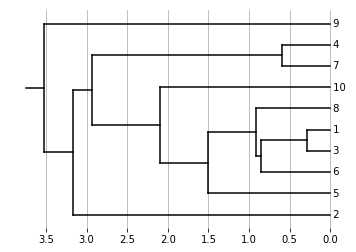

In [13]:
n = 10
lam = 0.5
simulatedTree = constructTree(n, lam)
plot_tree(simulatedTree)

In [14]:
L = 20 
u = 0.5
seqs = simDownTree(simulatedTree, L, u)
print(seqs)

[[0 1 3 0 2 1 2 3 0 2 1 2 0 0 0 0 2 3 2 3]
 [2 2 1 0 3 2 0 1 1 3 0 0 3 1 0 0 2 2 2 0]
 [3 3 3 0 3 2 1 2 0 3 3 1 0 2 0 0 1 1 1 3]
 [3 3 2 3 3 2 3 0 0 0 3 3 3 0 0 0 1 0 1 0]
 [3 3 2 0 3 2 3 0 0 0 3 3 0 2 0 2 1 0 1 0]
 [1 1 2 3 3 1 1 1 0 3 3 0 0 3 3 3 1 1 1 1]
 [0 1 3 1 1 2 0 2 1 3 1 1 0 3 3 1 2 0 2 0]
 [1 0 2 1 0 1 0 1 1 3 2 0 0 3 1 1 1 0 3 2]
 [1 1 2 1 2 0 0 1 1 3 2 1 0 3 0 1 3 3 3 2]
 [1 1 0 1 1 3 2 0 1 1 0 2 3 1 3 3 1 0 1 1]]


## 2c

In [16]:
def fxy(x, y):
    L = len(x)
    Dxy = np.sum(x != y)
    
    return min(Dxy * 1.0 / L, 0.75 - 1.0 / L)

def dxy(x, y):

    return (- 3.0 / 4) * np.log(1 - 4 * fxy(x, y) / 3.0)

In [17]:
def computeDis(seqs):
    n = len(seqs)
    dis = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            dis[i, j] = dxy(seqs[i], seqs[j])
            dis[j, i] = dis[i, j]
            
    return dis

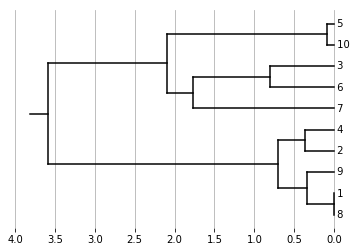

In [18]:
n = 10
lam = 0.5
simulatedTree = constructTree(n, lam)
plot_tree(simulatedTree)

In [19]:
L = 20 
u = 0.5
seqs = simDownTree(simulatedTree, L, u)
print(seqs)

[[0 3 1 1 0 1 3 3 3 3 0 2 0 2 1 0 3 2 0 2]
 [0 3 1 1 0 1 3 3 3 3 0 2 0 2 1 0 3 2 0 2]
 [0 3 1 1 3 1 3 3 3 1 0 2 0 2 1 2 3 2 0 2]
 [0 3 0 1 0 1 3 3 3 1 3 3 3 0 2 3 2 3 0 2]
 [0 3 1 1 0 1 0 3 1 2 3 3 3 0 2 3 3 0 0 2]
 [1 3 1 2 3 1 0 2 3 0 0 1 0 3 0 2 1 3 1 0]
 [1 3 0 2 0 3 0 2 3 0 3 1 3 2 1 0 1 0 2 2]
 [1 3 1 2 0 3 1 2 3 0 3 1 0 2 1 0 1 2 2 3]
 [1 2 0 2 2 3 1 1 0 0 1 3 1 2 1 0 2 0 0 2]
 [1 2 2 2 2 3 1 1 0 0 1 3 1 2 1 0 2 0 0 2]]


In [20]:
disMat = computeDis(seqs)
print(disMat)

[[ 0.         -0.          0.16735766  0.82395922  0.82395922  2.03103765
   1.51117727  0.99131688  2.03103765  2.03103765]
 [-0.          0.          0.16735766  0.82395922  0.82395922  2.03103765
   1.51117727  0.99131688  2.03103765  2.03103765]
 [ 0.16735766  0.16735766  0.          0.82395922  0.99131688  1.20707843
   2.03103765  1.51117727  2.03103765  2.03103765]
 [ 0.82395922  0.82395922  0.82395922  0.          0.38311922  2.03103765
   1.51117727  2.03103765  2.03103765  2.03103765]
 [ 0.82395922  0.82395922  0.99131688  0.38311922  0.          2.03103765
   1.51117727  2.03103765  2.03103765  2.03103765]
 [ 2.03103765  2.03103765  1.20707843  2.03103765  2.03103765  0.
   0.99131688  0.82395922  2.03103765  2.03103765]
 [ 1.51117727  1.51117727  2.03103765  1.51117727  1.51117727  0.99131688
   0.          0.30409883  0.82395922  0.99131688]
 [ 0.99131688  0.99131688  1.51117727  2.03103765  2.03103765  0.82395922
   0.30409883  0.          1.20707843  1.20707843]
 [ 2.031

## 2(d)

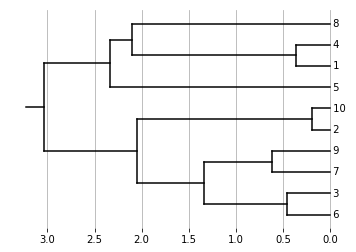

In [21]:
n = 10
lam = 0.5
simulatedTree = constructTree(n, lam)
plot_tree(simulatedTree)

### L = 20

In [22]:
L = 20 
u = 0.1
seqs = simDownTree(simulatedTree, L, u)
print(seqs)

[[1 2 3 3 1 3 2 1 3 2 1 2 3 3 3 3 3 2 0 2]
 [1 2 3 3 3 3 2 0 3 2 1 0 3 3 3 3 3 2 0 2]
 [1 2 3 3 3 3 2 1 3 2 0 0 2 3 3 3 0 2 2 2]
 [1 2 3 2 3 3 2 1 3 2 0 0 2 3 3 3 0 2 2 2]
 [1 1 3 1 3 0 2 1 3 2 0 0 3 3 3 3 2 1 2 0]
 [1 1 3 1 3 0 3 1 3 2 0 0 3 3 3 3 2 1 2 0]
 [3 1 0 3 3 3 2 1 3 2 0 0 2 3 0 1 2 0 2 0]
 [1 1 0 3 3 3 2 1 1 0 2 0 0 2 0 1 2 3 2 2]
 [1 1 0 3 3 3 2 1 2 0 2 0 0 2 0 1 2 0 2 2]
 [3 1 0 3 3 0 2 1 3 0 0 0 1 1 0 0 2 3 2 0]]


In [23]:
disMat = computeDis(seqs)
print(disMat)

[[ 0.          0.16735766  0.38311922  0.47145649  0.82395922  0.99131688
   1.51117727  2.03103765  2.03103765  2.03103765]
 [ 0.16735766  0.          0.30409883  0.38311922  0.68721805  0.82395922
   1.20707843  1.51117727  1.51117727  2.03103765]
 [ 0.38311922  0.30409883  0.          0.05174465  0.47145649  0.57160504
   0.57160504  0.99131688  0.99131688  1.20707843]
 [ 0.47145649  0.38311922  0.05174465  0.          0.47145649  0.57160504
   0.68721805  1.20707843  1.20707843  1.51117727]
 [ 0.82395922  0.68721805  0.47145649  0.47145649  0.          0.05174465
   0.57160504  1.20707843  1.20707843  0.68721805]
 [ 0.99131688  0.82395922  0.57160504  0.57160504  0.05174465  0.
   0.68721805  1.51117727  1.51117727  0.82395922]
 [ 1.51117727  1.20707843  0.57160504  0.68721805  0.57160504  0.68721805
   0.          0.57160504  0.47145649  0.38311922]
 [ 2.03103765  1.51117727  0.99131688  1.20707843  1.20707843  1.51117727
   0.57160504  0.          0.10732563  0.57160504]
 [ 2.031

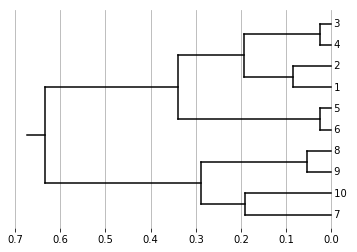

In [24]:
constructTree = compute_upgma_tree(disMat)
plot_tree(constructTree)

### L = 50

In [25]:
L = 50 
u = 0.1
seqs = simDownTree(simulatedTree, L, u)
print(seqs)

[[2 1 0 2 2 3 0 1 3 3 1 1 0 3 3 0 3 0 0 3 1 1 2 3 0 2 2 2 2 2 0 3 2 1 2 0 0
  0 0 1 1 3 2 1 1 2 0 3 2 3]
 [2 1 0 2 2 3 0 1 3 3 1 1 0 3 3 0 3 0 0 3 1 1 0 3 0 2 2 2 2 2 0 3 3 1 2 0 0
  0 0 1 1 3 2 1 1 2 0 3 2 3]
 [1 0 0 2 2 3 0 0 2 3 1 1 1 3 2 2 3 0 0 2 1 2 2 3 0 3 2 2 2 2 1 3 2 1 2 0 0
  1 0 0 1 3 2 1 1 2 0 3 2 3]
 [3 0 0 2 2 3 0 0 3 3 1 1 1 1 2 0 3 0 0 0 1 2 2 3 0 2 2 2 2 2 1 3 2 1 0 0 0
  0 0 3 1 3 2 1 1 2 0 3 2 3]
 [1 0 2 2 2 3 0 1 3 0 1 3 0 1 3 2 3 0 0 2 1 1 2 3 1 3 1 2 1 2 1 0 1 1 2 3 0
  0 0 2 2 3 2 1 1 0 0 3 2 3]
 [1 0 2 2 2 3 0 1 3 0 1 3 0 1 3 2 3 0 0 2 1 1 2 3 1 0 2 2 1 2 1 0 1 1 2 0 0
  0 0 2 2 3 2 1 1 0 0 3 2 3]
 [3 1 0 1 2 2 2 3 1 0 2 1 3 1 1 2 3 0 3 1 1 1 2 1 1 1 1 2 2 2 2 2 2 0 2 1 0
  0 0 3 2 3 3 0 1 0 3 3 2 1]
 [1 0 3 1 2 3 0 3 1 0 2 1 3 2 1 2 2 1 1 3 1 1 0 1 2 0 2 2 3 0 1 2 2 2 1 1 0
  0 0 2 2 3 0 1 1 0 3 0 1 3]
 [1 0 3 1 2 2 0 3 1 0 2 1 3 2 1 2 2 3 1 3 1 1 0 1 2 0 1 2 3 0 1 2 2 2 1 1 0
  0 0 2 2 3 0 1 1 0 3 0 1 3]
 [1 0 3 1 2 2 0 1 0 0 2 1 3 1 1 2 3 3 3 3 1 1 2 1 2 0 1

In [26]:
disMat = computeDis(seqs)
print(disMat)

[[ 0.          0.04110618  0.31925086  0.26039715  0.52992765  0.45293704
   1.11320608  1.59019765  2.03103765  1.20707843]
 [ 0.04110618  0.          0.38311922  0.31925086  0.57160504  0.49044485
   1.31440407  1.59019765  2.03103765  1.43969463]
 [ 0.31925086  0.38311922  0.          0.20582763  0.52992765  0.49044485
   1.31440407  1.43969463  1.77868347  1.31440407]
 [ 0.26039715  0.31925086  0.20582763  0.          0.61573541  0.52992765
   1.11320608  1.59019765  2.03103765  1.31440407]
 [ 0.52992765  0.57160504  0.52992765  0.61573541  0.          0.06253621
   0.95472426  1.11320608  1.11320608  0.88649542]
 [ 0.45293704  0.49044485  0.49044485  0.52992765  0.06253621  0.
   1.02978685  0.95472426  1.11320608  0.88649542]
 [ 1.11320608  1.31440407  1.31440407  1.11320608  0.95472426  1.02978685
   0.          0.82395922  0.71264421  0.52992765]
 [ 1.59019765  1.59019765  1.43969463  1.59019765  1.11320608  0.95472426
   0.82395922  0.          0.06253621  0.45293704]
 [ 2.031

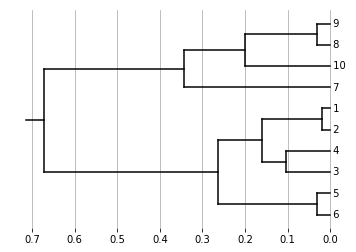

In [27]:
constructTree = compute_upgma_tree(disMat)
plot_tree(constructTree)

### L = 200

In [28]:
L = 200 
u = 0.1
seqs = simDownTree(simulatedTree, L, u)
print(seqs)

[[1 0 2 ..., 0 1 1]
 [1 0 2 ..., 0 1 1]
 [1 0 0 ..., 0 1 1]
 ..., 
 [1 2 0 ..., 0 3 1]
 [1 2 0 ..., 0 3 1]
 [1 0 0 ..., 0 2 1]]


In [29]:
disMat = computeDis(seqs)
print(disMat)

[[ 0.          0.06253621  0.24637805  0.26039715  0.57160504  0.58239659
   0.97279742  1.11320608  1.28609882  0.93707638]
 [ 0.06253621  0.          0.26750621  0.28192973  0.58239659  0.59334569
   1.02978685  1.20707843  1.40635581  0.97279742]
 [ 0.24637805  0.26750621  0.          0.08459662  0.51986039  0.52992765
   0.83911125  1.04978804  1.11320608  0.85457571]
 [ 0.26039715  0.28192973  0.08459662  0.          0.49044485  0.50992647
   0.87036577  0.99131688  1.09146542  0.83911125]
 [ 0.57160504  0.58239659  0.51986039  0.49044485  0.          0.02542616
   0.78025754  0.95472426  1.04978804  0.82395922]
 [ 0.58239659  0.59334569  0.52992765  0.50992647  0.02542616  0.
   0.78025754  0.95472426  1.02978685  0.79454368]
 [ 0.97279742  1.02978685  0.83911125  0.87036577  0.78025754  0.78025754
   0.          0.39997386  0.38311922  0.44384601]
 [ 1.11320608  1.20707843  1.04978804  0.99131688  0.95472426  0.95472426
   0.39997386  0.          0.06253621  0.31925086]
 [ 1.286

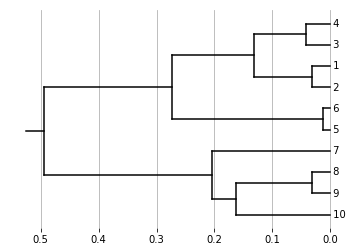

In [30]:
constructTree = compute_upgma_tree(disMat)
plot_tree(constructTree)

The reconstructions are very good. Increasing the sequence length improves
the accuracy of the reconstruction.